In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [3]:
adidas = pd.read_csv('reviewsAdidas.csv')
asics = pd.read_csv('reviewsAsics.csv')
newbalance = pd.read_csv('reviewsNewBalance.csv')
nike = pd.read_csv('reviewsNike.csv', encoding='ISO-8859-1')

## adidas

In [4]:
adidas['tokens'] = adidas['review'].apply(str.lower)
adidas['tokens'] = adidas['tokens'].map(nltk.word_tokenize)
adidas.head()

,review,tokens
0,"For the longest time, I had mixed emotions reg...","[for, the, longest, time, ,, i, had, mixed, em..."
1,These have been my favorite all purpose advent...,"[these, have, been, my, favorite, all, purpose..."
2,I wore Sambas in my late teens (I'm now 39 yea...,"[i, wore, sambas, in, my, late, teens, (, i, '..."
3,Adidas is always a little bit roomier than Nik...,"[adidas, is, always, a, little, bit, roomier, ..."
4,Delivery took a couple days longer than the 2-...,"[delivery, took, a, couple, days, longer, than..."


In [5]:
adidaslist = [item for sublist in adidas['tokens'].tolist() for item in sublist]

In [6]:
stopset = set(stopwords.words('english'))
stopset.update(['shoe', '.', ',', '"', "'", '?', '!', ':', ';', '<', '>', '(', ')', '[', ']', '{', '}'])
adidastokens = [w for w in adidaslist if not w in stopset]

adidaslemma = []
lemma = WordNetLemmatizer()

for i in adidastokens:
    new = lemma.lemmatize(i)
    adidaslemma.append(new)

In [7]:
adidastokensdf = pd.DataFrame({'words': adidaslemma})

In [8]:
adidastokensdf['words'].value_counts()

shoe              1080
great              590
pair               488
fit                445
wear               424
samba              423
br/                383
comfortable        379
size               369
love               359
n't                348
's                 324
year               311
foot               302
good               300
like               272
soccer             265
arch               243
look               234
classic            233
time               182
adidas             182
support            180
one                166
bought             158
've                157
well               156
bit                153
day                152
little             150
                  ... 
nonstop              1
cheapo               1
washed               1
compartment          1
challenge            1
backend              1
walmart              1
outfitted            1
outweighs            1
admire               1
alright              1
wouldnt              1
look.      

## asics

In [9]:
asics['tokens'] = asics['review'].apply(str.lower)
asics['tokens'] = asics['tokens'].map(nltk.word_tokenize)
asics.head()

,review,tokens
0,I have plantar fasciitis and I originally boug...,"[i, have, plantar, fasciitis, and, i, original..."
1,The toe portion of the shoe is already coming ...,"[the, toe, portion, of, the, shoe, is, already..."
2,"I do need to qualify this review, as I had no ...","[i, do, need, to, qualify, this, review, ,, as..."
3,First: These are absolutely trail shoes above ...,"[first, :, these, are, absolutely, trail, shoe..."
4,I buy a lot of ASICS shoes because 1) I know w...,"[i, buy, a, lot, of, asics, shoes, because, 1,..."


In [10]:
asicslist = [item for sublist in asics['tokens'].tolist() for item in sublist]

stopset = set(stopwords.words('english'))
stopset.update(['shoes', '.', ',', '"', "'", '?', '!', ':', ';', '<', '>', '(', ')', '[', ']', '{', '}'])
asicstokens = [w for w in asicslist if not w in stopset]

asicslemma = []
lemma = WordNetLemmatizer()

for i in asicstokens:
    new = lemma.lemmatize(i)
    asicslemma.append(new)

In [11]:
asicstokensdf = pd.DataFrame({'words': asicslemma})
asicstokensdf['words'].value_counts()

shoe              850
fit               719
great             710
comfortable       612
pair              584
good              569
asics             537
foot              505
running           496
wear              410
n't               404
size              401
br/               397
like              374
well              324
day               276
's                257
've               249
price             245
love              240
bought            240
support           229
time              228
year              219
would             215
feel              208
'm                203
one               202
run               201
use               195
                 ... 
aware               1
complaints.         1
conservative        1
2x                  1
27                  1
fedex               1
crowd               1
inadequate          1
susceptible         1
pale                1
rigorous            1
290                 1
10.5-11             1
around/gym/dog      1
inbetween 

## brand co-mentions

In [12]:
adidas = pd.read_csv('reviewsAdidas.csv')
asics = pd.read_csv('reviewsAsics.csv')
newbalance = pd.read_csv('reviewsNewBalance.csv')
nike = pd.read_csv('reviewsNike.csv', encoding='ISO-8859-1')

In [13]:
adidas['review'] = adidas['review'].apply(str.lower)
asics['review'] = asics['review'].apply(str.lower)
newbalance['review'] = newbalance['review'].apply(str.lower)
nike['review'] = nike['review'].apply(str.lower)

In [14]:
adidas['review'] = 'adidas ' + adidas['review'].astype(str)
asics['review'] = 'asics ' + asics['review'].astype(str)
newbalance['review'] = 'newbalance ' + newbalance['review'].astype(str)
nike['review'] = 'nike ' + nike['review'].astype(str)

In [15]:
shoes = pd.DataFrame()
shoes = shoes.append(adidas).append(asics).append(newbalance).append(nike)

In [16]:
shoes.head()

,review
0,"adidas for the longest time, i had mixed emoti..."
1,adidas these have been my favorite all purpose...
2,adidas i wore sambas in my late teens (i'm now...
3,adidas adidas is always a little bit roomier t...
4,adidas delivery took a couple days longer than...


In [17]:
shoes['review'] = shoes['review'].str.replace('new balance', 'newbalance')

In [18]:
shoes['tokens'] = shoes['review'].map(nltk.word_tokenize)

In [19]:
brands = ['adidas', 'asics', 'newbalance', 'nike']

def get_brands(tokens):
    result = []
    for t in tokens:
        t = t.lower()
        if t in brands and not (t in result):
            result.append(t)
    return result

shoes['brands'] = shoes['tokens'].apply(get_brands)

In [20]:
shoes

,review,tokens,brands
0,"adidas for the longest time, i had mixed emoti...","[adidas, for, the, longest, time, ,, i, had, m...",[adidas]
1,adidas these have been my favorite all purpose...,"[adidas, these, have, been, my, favorite, all,...",[adidas]
2,adidas i wore sambas in my late teens (i'm now...,"[adidas, i, wore, sambas, in, my, late, teens,...",[adidas]
3,adidas adidas is always a little bit roomier t...,"[adidas, adidas, is, always, a, little, bit, r...","[adidas, nike]"
4,adidas delivery took a couple days longer than...,"[adidas, delivery, took, a, couple, days, long...",[adidas]
5,adidas my teenage son is addicted to samba's. ...,"[adidas, my, teenage, son, is, addicted, to, s...",[adidas]
6,adidas i didn’t look carefully enough at the p...,"[adidas, i, didn, ’, t, look, carefully, enoug...",[adidas]
7,adidas buying shoes on line can be tricky thes...,"[adidas, buying, shoes, on, line, can, be, tri...",[adidas]
8,adidas i've worn sambas much throughout my you...,"[adidas, i, 've, worn, sambas, much, throughou...",[adidas]
9,adidas these are a pretty narrow shoe--at leas...,"[adidas, these, are, a, pretty, narrow, shoe, ...",[adidas]


In [21]:
flatBrands = [item for sublist in shoes['brands'].tolist() for item in sublist]
pd.Series(flatBrands).value_counts()

newbalance    2531
nike          2075
adidas        2016
asics         2011
dtype: int64

In [22]:
listcomments = shoes['tokens'].tolist()

In [23]:
listcomments

[['adidas',
  'for',
  'the',
  'longest',
  'time',
  ',',
  'i',
  'had',
  'mixed',
  'emotions',
  'regarding',
  'sneakers',
  '.',
  'too',
  'often',
  ',',
  'i',
  'really',
  'disliked',
  'the',
  'neon',
  'colors',
  'even',
  'if',
  'they',
  'were',
  'supportive',
  '.',
  'regular',
  '``',
  'fashion',
  'sneakers',
  "''",
  'would',
  'be',
  'too',
  'cheap',
  'or',
  'flimsy',
  'to',
  'wear',
  'regularly',
  '.',
  'and',
  'even',
  'though',
  'i',
  'still',
  'remain',
  'a',
  'fan',
  'of',
  'shoes',
  'like',
  'converse',
  ',',
  'i',
  'needed',
  'a',
  'pair',
  'of',
  'sneakers',
  'that',
  'had',
  'the',
  'arch',
  'support',
  'i',
  'needed',
  'that',
  'also',
  'did',
  "n't",
  'clash',
  'with',
  'what',
  'i',
  'was',
  'wearing.',
  '<',
  'br/',
  '>',
  '<',
  'br/',
  '>',
  'i',
  'looked',
  'around',
  'for',
  'a',
  'bit',
  'online',
  'and',
  'eventually',
  'settled',
  'upon',
  'these',
  ',',
  'especially',
  'sin

In [24]:
dflift = pd.DataFrame(index = brands, columns = brands)

def twobrandcount(brand1, brand2, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand1) != 0 and eachcomment.count(brand2) != 0:
            count += 1
    return count

def singlebrandcount(brand, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand) != 0:
            count += 1
    return count

def liftratio(brand1, brand2, clist):
    numerator = twobrandcount(brand1, brand2, clist)*len(clist)
    denominator = singlebrandcount(brand1, clist)*singlebrandcount(brand2, clist)
    lift = float(numerator)/denominator
    return lift


for eachbrand in brands:
    brands = [brand for brand in brands if brand != eachbrand]
    for j in range(len(brands)):
        dflift[brands[j]].loc[eachbrand] = liftratio(brands[j], eachbrand, listcomments)
        dflift[eachbrand].loc[brands[j]] = dflift[brands[j]][eachbrand]
        
dflift

,adidas,asics,newbalance,nike
adidas,NaN,0.0295843,0.0156708,0.0382291
asics,0.0295843,NaN,0.0942583,0.0804807
newbalance,0.0156708,0.0942583,NaN,0.765827
nike,0.0382291,0.0804807,0.765827,NaN


In [25]:
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_classification
from sklearn import manifold
from matplotlib import pyplot as plt
import numpy as np

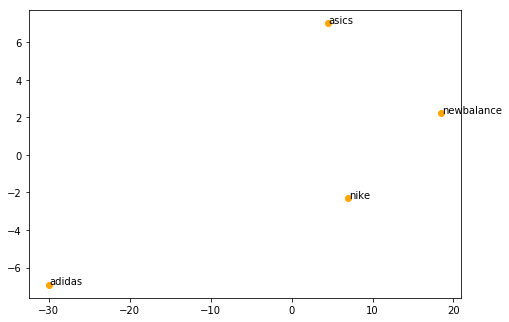

In [26]:
mdsdf = 1/dflift
mdsdf = mdsdf.replace(np.nan, 0)
mdsmatrix = mdsdf.as_matrix()

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(mdsmatrix)
coords = results.embedding_
n = list(dflift.index)
x = coords[:, 0]
y = coords[:,1]
fig = plt.figure(1)
ax = plt.axes([0.,0.,1.,1.])
plt.scatter(coords[:, 0], coords[:, 1], marker = 'o', color='orange')

for i, n in enumerate(n):
    ax.annotate(n,(x[i]+.07, y[i]))
plt.show()

## Calculating Lift Values for Brand Identity
##### Check if brand image words are in the list

In [164]:
brandimage = pd.read_csv('brandImagewords.csv',encoding='ISO-8859-1',sep=',')
brandimage['image'] = brandimage['image'].map(str.lower)
imagelist = brandimage['image'].tolist()
imagelist
comments= [item for sublist in listcomments for item in sublist]
for i in imagelist:
    print (i, (i in comments))

spirited True
aggressive True
excited True
athlete True
authentic True
leading True
practical True
trust True
fashion True
retro True
lifestyle True
forward True
bright True
happy True
positive True
selected True


In [206]:
top4shoes = ['nike', 'adidas', 'newbalance', 'asics']
nikeAttributes = brandimage['image']
dfattributelift = pd.DataFrame(index = nikeAttributes, columns = top4shoes)

def twobrandcount(brand1, attribute, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand1) != 0 and eachcomment.count(attribute) != 0:
            count += 1
    return count

def singlebrandcount(brand, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand) != 0:
            count += 1
    return count

def liftratio(brand1, attribute, clist):
    numerator = twobrandcount(brand1, attribute, clist)*len(clist)
    denominator = singlebrandcount(brand1, clist)*singlebrandcount(attribute, clist)
    lift = float(numerator)/denominator
    
#     if denominator == 0:
#         lift = 0
#     else:
#         lift = float(numerator)/denominator
    return lift

# for eachbrand in brands:
#     brands = [brand for brand in brands if brand != eachbrand]
#     for j in range(len(brands)):
#         dflift[brands[j]].loc[eachbrand] = liftratio(brands[j], eachbrand, listcomments)
#         dflift[eachbrand].loc[brands[j]] = dflift[brands[j]][eachbrand]
        
# dflift

for i in top4shoes:
    for j in nikeAttributes:
        dfattributelift.set_value(i, j, liftratio(i,j, listcomments))


df_brandimage = dfattributelift[brandimage['image']][16:].T
# df_brand = brandimage.set_index('image')[:17]
# df_brandimage = pd.concat([df_brandimage,df_brand])
df_brandimage['Suppose_brand'] = brandimage['brand'].tolist()
df_brandimage.to_csv("brandimage.csv")
df_brandimage

image,nike,adidas,newbalance,asics,Suppose_brand
spirited,0.000000,1.983135,0.000000,1.988066,Nike
aggressive,0.321124,0.661045,0.526538,2.319410,Nike
excited,0.770699,1.586508,1.263690,0.795226,Nike
athlete,0.000000,2.644180,0.000000,1.325377,Nike
authentic,0.481687,2.974702,0.394903,0.000000,Adidas
leading,0.000000,0.000000,0.000000,3.976131,Adidas
practical,0.000000,1.983135,0.000000,1.988066,Adidas
trust,1.133381,0.466620,1.486694,1.169450,Adidas
fashion,0.770699,1.850926,1.053075,0.530151,NewBalance
retro,0.000000,3.966270,0.000000,0.000000,NewBalance
